# CNN model from scratch for predicting the stage based on images

In [1]:
#PACKAGE IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten, Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras import optimizers
import os
from keras.preprocessing.image import ImageDataGenerator
from random import sample,seed
from keras.callbacks import EarlyStopping
import seaborn as sns
from sklearn.model_selection import train_test_split

physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [3]:
#Import Dataframe
path='Small Img'
df=pd.read_csv('2012_2019_PlatteRiverWeir_features_merged_all.csv')
df=df.iloc[:,2:7].drop(columns=[' Agency',' SiteNumber',' TimeZone'])
df.rename(columns={' Filename':'Filename', ' Stage':'Stage'},inplace=True)
df['Filename'] = df['Filename'].apply(lambda x: f"{path}/{x}")
df

,Filename,Stage
0,Small Img/StateLineWeir_20120609_Farrell_001.jpg,2.99
1,Small Img/StateLineWeir_20120609_Farrell_002.jpg,2.99
2,Small Img/StateLineWeir_20120609_Farrell_003.jpg,2.96
3,Small Img/StateLineWeir_20120609_Farrell_004.jpg,2.94
4,Small Img/StateLineWeir_20120609_Farrell_005.jpg,2.94
...,...,...
42054,Small Img/StateLineWeir_20191011_Farrell_409.jpg,2.54
42055,Small Img/StateLineWeir_20191011_Farrell_410.jpg,2.54
42056,Small Img/StateLineWeir_20191011_Farrell_411.jpg,2.54
42057,Small Img/StateLineWeir_20191011_Farrell_412.jpg,2.54


In [4]:
#Definition of train and test sets
train, test = train_test_split(df, test_size=0.2)

In [5]:
#Parameters definition
IMAGE_WIDTH=150
IMAGE_HEIGHT=150
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3
batch_size=64
epochs=30

In [6]:
#Image generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_dataframe(
    train, 
    x_col='Filename',
    y_col='Stage',
    class_mode='raw',
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    subset='training'
)

Found 26918 validated image filenames.


In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    test,
    x_col='Filename',
    y_col='Stage',
    target_size=IMAGE_SIZE,
    class_mode='raw',
    batch_size=batch_size
)

validation_generator = train_datagen.flow_from_dataframe(
    train,
    x_col='Filename',
    y_col='Stage',
    target_size=IMAGE_SIZE,
    class_mode='raw',
    batch_size=batch_size,
    subset='validation'
)

Found 8412 validated image filenames.
Found 6729 validated image filenames.


In [8]:
#Definition of earlystop parameter
earlystop = EarlyStopping(patience=4)

In [9]:
#Defining model
from keras.activations import activation_layers
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(150,150,3)))
model.add(Conv2D(32, (3, 3)))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1,activation='linear'))


In [10]:
#Compiling model
from sklearn.metrics import r2_score
compiled=model.compile(loss="mse", optimizer='adam',metrics=[r2_score],run_eagerly=True) 

In [11]:
#Training model
history=model.fit(train_generator,validation_data=validation_generator, epochs=epochs,callbacks=[earlystop])

Epoch 1/30
421/421 [==============================] - 221s 508ms/step - loss: 2.8807 - r2_score: -4.0155 - val_loss: 0.1033 - val_r2_score: 0.8369
Epoch 2/30
421/421 [==============================] - 125s 296ms/step - loss: 0.0690 - r2_score: 0.8907 - val_loss: 0.0448 - val_r2_score: 0.9275
Epoch 3/30
421/421 [==============================] - 124s 295ms/step - loss: 0.0402 - r2_score: 0.9349 - val_loss: 0.0321 - val_r2_score: 0.9455
Epoch 4/30
421/421 [==============================] - 125s 297ms/step - loss: 0.0332 - r2_score: 0.9456 - val_loss: 0.0254 - val_r2_score: 0.9570
Epoch 5/30
421/421 [==============================] - 123s 292ms/step - loss: 0.0277 - r2_score: 0.9549 - val_loss: 0.0276 - val_r2_score: 0.9521
Epoch 6/30
421/421 [==============================] - 122s 289ms/step - loss: 0.0232 - r2_score: 0.9617 - val_loss: 0.0204 - val_r2_score: 0.9655
Epoch 7/30
421/421 [==============================] - 122s 290ms/step - loss: 0.0209 - r2_score: 0.9653 - val_loss: 0.0261 

In [13]:
#Saving results
result=history.history
historydf=pd.DataFrame(result)
historydf

,loss,r2_score,val_loss,val_r2_score
0,2.880668,-4.015506,0.103280,0.836902
1,0.069037,0.890729,0.044772,0.927517
2,0.040186,0.934850,0.032059,0.945498
3,0.033245,0.945629,0.025402,0.957033
4,0.027733,0.954887,0.027640,0.952108
5,0.023186,0.961685,0.020412,0.965503
6,0.020890,0.965280,0.026103,0.955693
7,0.018774,0.969502,0.016408,0.972158
8,0.016758,0.972491,0.020578,0.964682
9,0.016470,0.972866,0.014007,0.976024


In [14]:
#Evaluating model
evaluation =model.evaluate(test_generator, batch_size=batch_size)

132/132 [==============================] - 54s 412ms/step - loss: 0.0142 - r2_score: 0.9775


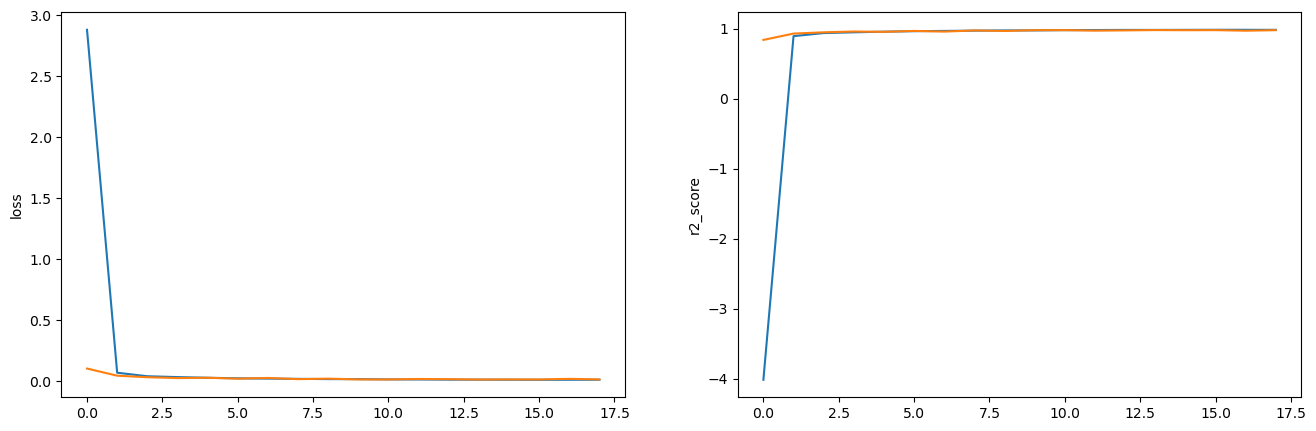

In [15]:
#Ploting model performance
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.lineplot(ax=axes[0],data=historydf, x=historydf.index, y="loss")
sns.lineplot(ax=axes[0],data=historydf, x=historydf.index, y="val_loss")
sns.lineplot(ax=axes[1],data=historydf, x=historydf.index, y="r2_score")
sns.lineplot(ax=axes[1],data=historydf, x=historydf.index, y="val_r2_score")

plt.show()

In [17]:
#Saved model for webapp integration
model.save('CNN')